# Project 2
# Thomas Pinto Franco
# 11/22/19

Introduction: The main goal of this project is to analyze given data from the LMT in a variety of methods that we have learned over the course of the semester. This involves creating a fit function for the given data, plotting and analyzing residuals, and answering questions about other aspects of the LMT data. 

Results: The final results show that this code does indeed work, primarily due to the graphs of the fit function, which much of the other analysis in this code stems from. This will all be explored in the following code blocks, with analysis and explanation.

## First: Copy-pasting data reader for ease of access

Text(0.5, 0, 'ID')

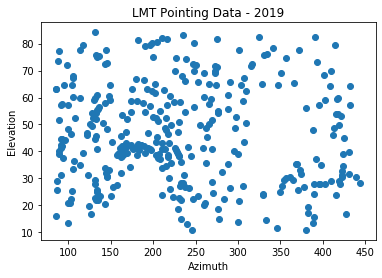

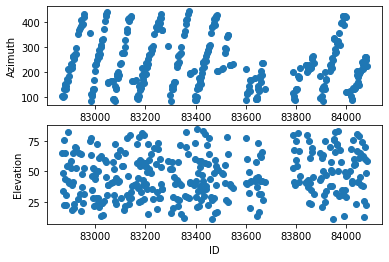

In [53]:
import numpy as np
import csv

import matplotlib.pyplot as pl

filename = 'Spring2019PointingData.csv'

f = open(filename,'r')
r = csv.reader(f)

# create lists
Group = []
SourceName= []
ID = []
SFlux = []
SFluxErr = []
SNR = []
AzList = []
ElList = []
AzOffList = []
AzErrList = []
ElOffList = []
ElErrList = []

for row in r:
    Group.append(eval(row[0]))
    SourceName.append(row[1])
    ID.append(eval(row[2]))
    AzList.append(eval(row[3]))
    ElList.append(eval(row[4]))
    SFlux.append(eval(row[5]))
    SFluxErr.append(eval(row[6]))
    SNR.append(eval(row[7]))
    AzOffList.append(eval(row[8]))
    AzErrList.append(eval(row[9]))
    ElOffList.append(eval(row[10]))
    ElErrList.append(eval(row[11]))

# create some numpy arrays
grp = np.array(Group)
ID = np.array(ID)
SNR = np.array(SNR)
a = np.array(AzList)
e = np.array(ElList)
apom = np.array(AzOffList)
azerr = np.array(AzErrList)
epom = np.array(ElOffList)
elerr = np.array(ElErrList)
 
pl.ion()
pl.figure()
pl.plot(a,e,'o')
pl.xlabel('Azimuth')
pl.ylabel('Elevation')
pl.title('LMT Pointing Data - 2019')
pl.figure()
pl.subplot(2,1,1)
pl.plot(ID,a,'o')
pl.ylabel('Azimuth')
pl.subplot(2,1,2)
pl.plot(ID,e,'o')
pl.ylabel('Elevation')
pl.xlabel('ID')

## 3.1.2 - Graphing the data, look at histograms

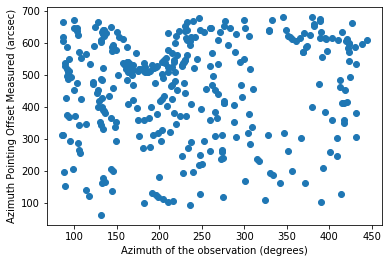

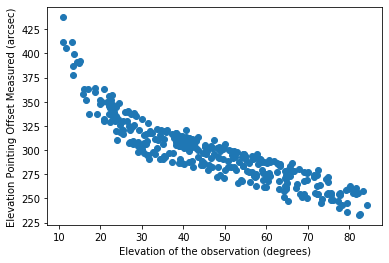

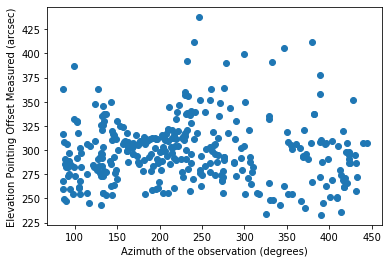

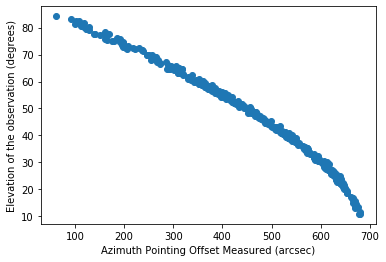

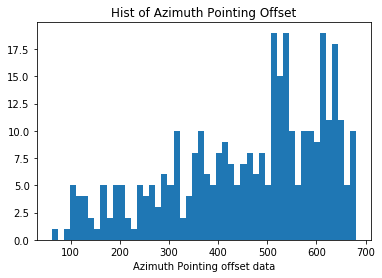

Standard Deviation of Apom: 156.24778473396069
Mean of Apom: 458.2284057971015


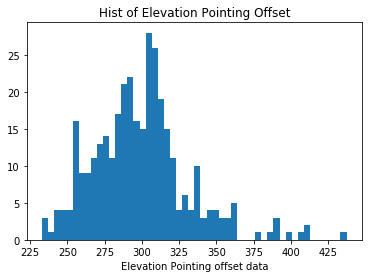

Standard Deviation of Epom: 32.13057417344072
Mean of Epom: 298.93333333333334


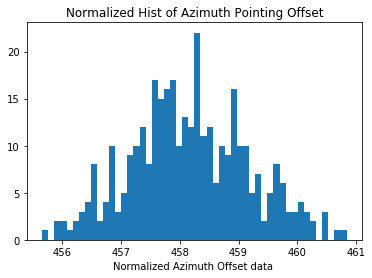

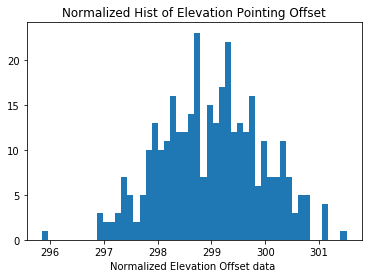

In [274]:
from numpy.random import RandomState

r = RandomState()

pl.figure() #Most of the code here is self-explanatory, creating plots and finding the STD and Means of data.
pl.ylabel('Azimuth Pointing Offset Measured (arcsec)')
pl.xlabel('Azimuth of the observation (degrees)')
pl.plot(a,apom,'o')
pl.show()

pl.figure()
pl.ylabel('Elevation Pointing Offset Measured (arcsec)')
pl.xlabel('Elevation of the observation (degrees)')
pl.plot(e,epom,'o')
pl.show()

pl.figure()
pl.ylabel('Elevation Pointing Offset Measured (arcsec)')
pl.xlabel('Azimuth of the observation (degrees)')
pl.plot(a,epom,'o')
pl.show()

pl.figure()
pl.xlabel('Azimuth Pointing Offset Measured (arcsec)')
pl.ylabel('Elevation of the observation (degrees)')
pl.plot(apom,e,'o')
pl.show()

pl.figure()
pl.title('Hist of Azimuth Pointing Offset')
pl.hist(apom, bins=50)
pl.xlabel('Azimuth Pointing offset data')
pl.show()
print('Standard Deviation of Apom:',np.std(apom))
print('Mean of Apom:',np.mean(apom))


pl.figure()
pl.title('Hist of Elevation Pointing Offset')
pl.hist(epom, bins=50)
pl.xlabel('Elevation Pointing offset data')
pl.show()
print('Standard Deviation of Epom:',np.std(epom))
print('Mean of Epom:',np.mean(epom))

apomNormal = r.randn(len(apom)) + np.mean(apom)  #Normalizing the offset data using a normalized random distribution 
epomNormal = r.randn(len(epom)) + np.mean(epom)

pl.figure()
pl.title('Normalized Hist of Azimuth Pointing Offset') #... and then plotting it on histograms
pl.hist(apomNormal, bins=50)
pl.xlabel('Normalized Azimuth Offset data ')
pl.show()

pl.figure()
pl.title('Normalized Hist of Elevation Pointing Offset')
pl.hist(epomNormal, bins=50)
pl.xlabel('Normalized Elevation Offset data ')
pl.show()

Looking at the initial two Azimuth and Elevation graphs, we interestingly see that the Azimuth vs Azimuth offset graph bears a resemblence to the Elevation vs Azimuth graph. It looks almost the same, if not for being inverted in comparison. We also see a very distinct downward trend for the Elevation vs Elevation offset graph, showing that as the elevation offset increases, the elevation itself decreases. For the elevation pointing offset vs azimuth graph, it looks similar to the initial APOM vs Azimuth, with the same parabolic curve and gaps. The graph for EPOM vs APOM shows a distinct logarithmic decay. 

For the histograms, we see maximums around 500-600 for the Azimuth offset and 300-325; whereas when normalized, maximums range around their respective means.

## 3.2 - Fit the data

------Fitting Data w/ least squares------


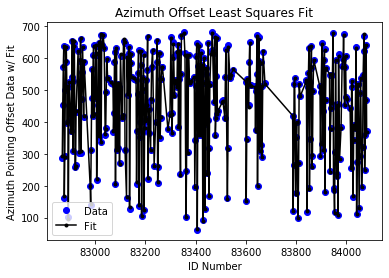

Root Mean Square: 2.2493736014549275
A1= -13.033730462877429 +/- 2.330973184620788
A2= 18.157734982247348 +/- 1.847624891734692
A3= 700.4505832330469 +/- 1.669435825355417
A4= -8.39783086898774 +/- 0.23777651491207033
A5= 9.434532830828857 +/- 0.26792014046465906


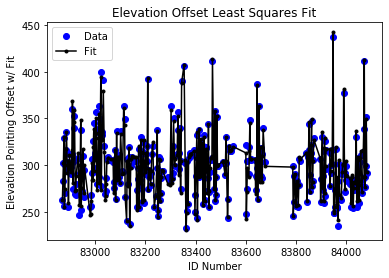

Root Mean Square: 3.497913027275659
E1= 159.45022597943898 +/- 7.44835164430442
E2= 36.971849411282165 +/- 0.8840529688691381
E3= 65.06734559996403 +/- 3.3835552581352593
E4= 72.22971009544563 +/- 6.512195821207069
E5= -10.698504940832436 +/- 0.30065912955886775
E6= -9.90565368743134 +/- 0.26727190081621616


In [72]:
print('------Fitting Data w/ least squares------')

Az = np.radians(a) #We want these values (which are originally in degrees) in radians, as we
El = np.radians(e) # will be plugging them into sines and cosines

#------------------------------------------------------------------------------
#This first code block is for the Azimuth offset data.

nparA = 5 #amount of parameters for this fit
nobsA = len(a) #number of observations

M = np.column_stack( (np.ones(nobsA),np.sin(El),np.cos(El),np.sin(El)*np.sin(Az),np.sin(El)*np.cos(Az)) )

MTM = np.dot(M.transpose(),M)
MTMinv = np.linalg.inv(MTM)
MTY = np.dot(M.transpose(),apom)

A = np.dot(MTMinv,MTY) #solution

residsA = apom - np.dot(M,P) #calculating residuals
chiSqA = np.dot(residsA.transpose(), residsA) #calculating chi squared
RMSa = np.sqrt(chiSqA/nobsA) # and finally calculating the root mean squared

Ca = MTMinv * chiSqA/(nobsA-nparA) #Covariance Matrix
# our given model function
fp5 = A[0] + A[1]*np.sin(El) + A[2]*np.cos(El) + A[3]*np.sin(El)*np.sin(Az) + A[4]*np.sin(El)*np.cos(Az)

pl.figure()
pl.plot(ID,apom,'bo', label='Data')
pl.plot(ID,fp5,'ko-',markersize=3, label='Fit') 
pl.title('Azimuth Offset Least Squares Fit')
pl.xlabel('ID Number')
pl.ylabel('Azimuth Pointing Offset Data w/ Fit')
pl.legend()
pl.show()
print('Root Mean Square:',RMSa)

print('A1=',A[0], '+/-', np.sqrt(Ca[0,0])) #Errors we want are going to be the diagonals down said matrix
print('A2=',A[1], '+/-', np.sqrt(Ca[1,1]))
print('A3=',A[2], '+/-', np.sqrt(Ca[2,2]))
print('A4=',A[3], '+/-', np.sqrt(Ca[3,3]))
print('A5=',A[4], '+/-', np.sqrt(Ca[4,4]))

#------------------------------------------------------------------------------

nparE = 6
nobsE = len(e)

M2 = np.column_stack( (np.ones(nobsE),1/np.tan(El),np.cos(El),np.sin(El),np.cos(Az),np.sin(Az)) )

MTM = np.dot(M2.transpose(),M2)
MTMinv = np.linalg.inv(MTM)
MTY = np.dot(M2.transpose(),epom)

E = np.dot(MTMinv,MTY) #solution

residsE = epom - np.dot(M2,E)
chiSqE = np.dot(residsE.transpose(),residsE)
RMSe = np.sqrt(chiSqE/nobsE)

Ce = MTMinv * chiSqE/(nobsE-nparE)

fp6 = E[0] + E[1]*1/np.tan(El) + E[2]*np.cos(El) + E[3]*np.sin(El) + E[4]*np.cos(Az) +E[5]*np.sin(Az)

pl.figure()
pl.plot(ID,epom,'bo',label='Data')
pl.plot(ID,fp6,'ko-', markersize=3, label='Fit')
pl.title('Elevation Offset Least Squares Fit')
pl.xlabel('ID Number')
pl.ylabel('Elevation Pointing Offset w/ Fit')
pl.legend()
pl.show()
print('Root Mean Square:',RMSe)

print('E1=',E[0], '+/-', np.sqrt(Ce[0,0]))
print('E2=',E[1], '+/-', np.sqrt(Ce[1,1]))
print('E3=',E[2], '+/-', np.sqrt(Ce[2,2]))
print('E4=',E[3], '+/-', np.sqrt(Ce[3,3]))
print('E5=',E[4], '+/-', np.sqrt(Ce[4,4]))
print('E6=',E[5], '+/-', np.sqrt(Ce[5,5]))


------------------------------
Graphs of Residuals:


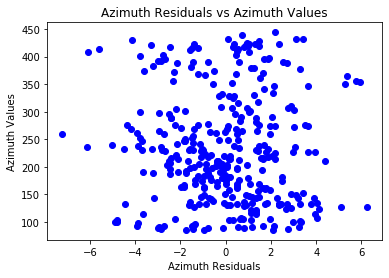

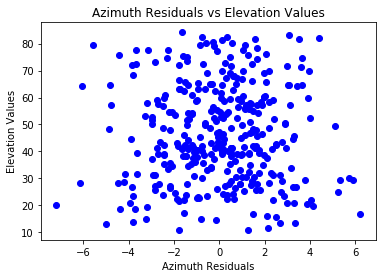

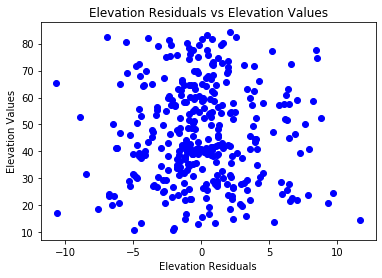

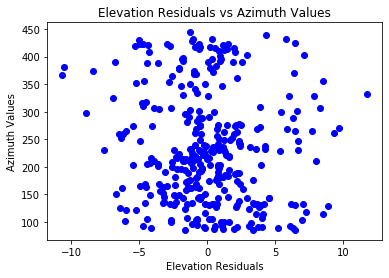

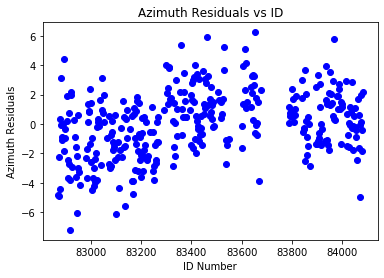

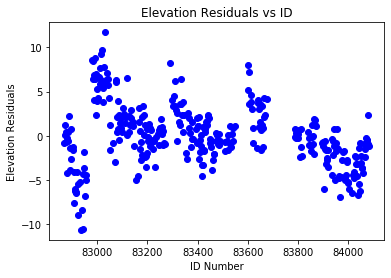

In [65]:
print('------------------------------')
print('Graphs of Residuals:') #Self-explanatory; all the different graphs of residuals we need.
pl.figure()
pl.title('Azimuth Residuals vs Azimuth Values')
pl.xlabel('Azimuth Residuals')
pl.ylabel('Azimuth Values')
pl.plot(residsA,a,'bo')
pl.show()

pl.figure()
pl.title('Azimuth Residuals vs Elevation Values')
pl.xlabel('Azimuth Residuals')
pl.ylabel('Elevation Values')
pl.plot(residsA,e,'bo')
pl.show()

pl.figure()
pl.title('Elevation Residuals vs Elevation Values')
pl.xlabel('Elevation Residuals')
pl.ylabel('Elevation Values')
pl.plot(residsE,e,'bo')
pl.show()

pl.figure()
pl.title('Elevation Residuals vs Azimuth Values')
pl.xlabel('Elevation Residuals')
pl.ylabel('Azimuth Values')
pl.plot(residsE,a,'bo')
pl.show()

pl.figure()
pl.title('Azimuth Residuals vs ID')
pl.ylabel('Azimuth Residuals')
pl.xlabel('ID Number')
pl.plot(ID,residsA,'bo')
pl.show()

pl.figure()
pl.title('Elevation Residuals vs ID')
pl.ylabel('Elevation Residuals')
pl.xlabel('ID Number')
pl.plot(ID,residsE,'bo')
pl.show()

----------------------------------
Histograms of Pointing Data:


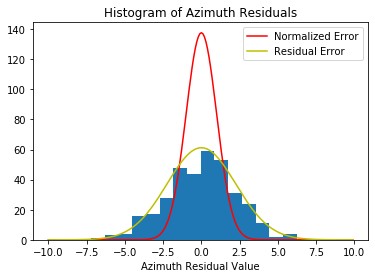

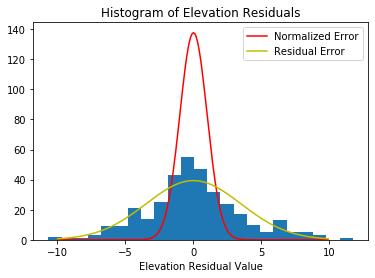

In [254]:
print('----------------------------------')
print('Histograms of Pointing Data:')
def gaussian(x,sigma):
    return(nobsA*(1/np.sqrt((2*np.pi*sigma**2))*np.exp(-(x**2)/(2*sigma**2))))
x = np.arange(-10.,10.,0.1)


pl.figure()
pl.title('Histogram of Azimuth Residuals')
pl.hist(residsA,bins=15)
pl.plot(x,gaussian(x,1),'r-',label = 'Normalized Error')
pl.plot(x,gaussian(x,RMSa),'y-',label = 'Residual Error')
pl.legend()
pl.xlabel('Azimuth Residual Value')
pl.show()

pl.figure()
pl.title('Histogram of Elevation Residuals')
pl.hist(residsE,bins=23)
pl.plot(x,gaussian(x,1),'r-',label = 'Normalized Error')
pl.plot(x,gaussian(x,RMSe),'y-',label = 'Residual Error')
pl.legend()
pl.xlabel('Elevation Residual Value')
pl.show()

# 3.3 - Assessing the fit:

* By fitting the model, pointing errors have improved notably.
    Original STD values before the fit were 156.24778473396069 and 32.13057417344072 for Azimuth and Elevation pointing offset, respectively.
    Compared to the RMS of the fit, which are 2.2493736014549275 and 3.497913027275659 for Azimuth and Elevation pointing offset, respectively. This demonstrates that our fit is a good one!

* By looking at the histograms of the residuals, we can see that they absolutely follow a normal distribution, with data clustered around the origin and sparse near the opposing ends of the axis.

* Although the Azimuth and Elevation residuals act similar, they are not distinctly the same; they seem to be scattered randomly, centered around zero (which explains the normal distribution in the histograms). 

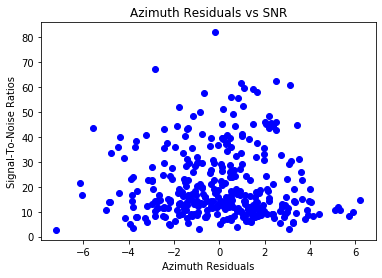

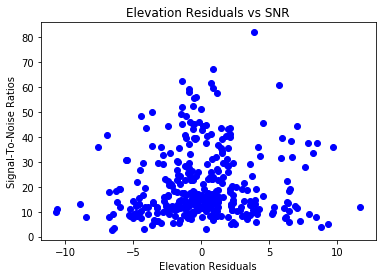

In [71]:
pl.figure()
pl.title('Azimuth Residuals vs SNR')
pl.xlabel('Azimuth Residuals')
pl.ylabel('Signal-To-Noise Ratios')
pl.plot(residsA,SNR,'bo')
pl.show()

pl.figure()
pl.title('Elevation Residuals vs SNR')
pl.xlabel('Elevation Residuals')
pl.ylabel('Signal-To-Noise Ratios')
pl.plot(residsE,SNR,'bo')
pl.show()

* If residuals got smaller as SNR became larger, we would expect to see a negative trend on these above graphs
    This is not the case however, as the graphs present no real correlation besides the majority of points clustering around the center of the graph, which suggests a normal distribution.

* There are no apparent, systematic trends in the initial four residual graphs. Thus we don't have to worry about any unmodeled effects.

* The residuals plotted against ID number does show a trend, primarily clustering groups that follow a curved/parabolic path (this is much more apparent on the elevation graph). This would indeed indicate that something about the model is changing with time.

## Conclusion

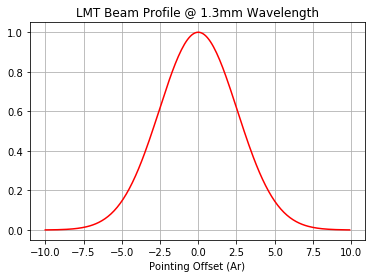

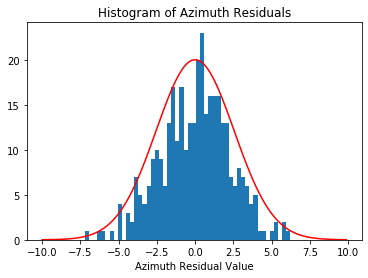

STD of Azimuth Residuals: 2.2493736014549275


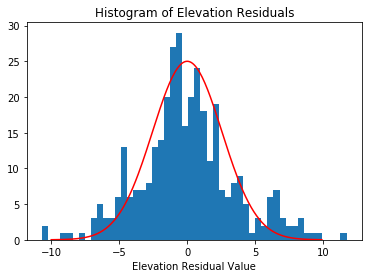

STD of Elevation Residuals: 3.497913027275659


In [276]:
residsAstd = np.std(residsA) #These just equal the RMS from the fits but still
residsEstd = np.std(residsE)

#gaussian = lambda theta: np.exp(-4*np.log(2)*((theta)**2)/36)
x = np.arange(-10.,10.,0.1)

def gaussian(x):
    return(np.exp(-4*np.log(2)*((x)**2)/(6**2)))

pl.figure()
pl.title('LMT Beam Profile @ 1.3mm Wavelength')
pl.plot(x,gaussian(x),'r-')
pl.grid()
pl.xlabel('Pointing Offset (Ar)')
pl.show()

pl.figure()
pl.title('Histogram of Azimuth Residuals')
pl.hist(residsA,bins=50)
pl.plot(x,20*gaussian(x),'r-') #eyeballed the height of the y-axis on the histograms in order to properly fit
pl.xlabel('Azimuth Residual Value') #the gaussian to the residuals. Mainly just for the visual
pl.show()
print('STD of Azimuth Residuals:',residsAstd)


pl.figure()
pl.title('Histogram of Elevation Residuals')
pl.hist(residsE,bins=50)
pl.plot(x,25*gaussian(x),'r-')
pl.xlabel('Elevation Residual Value')
pl.show()
print('STD of Elevation Residuals:',residsEstd)

For the first curve above: this is a graph of the given gaussian function for the LMT Beam Profile at 1.3mm wavelength. This curve has been (roughly) fitted to the histograms of the Azimuth and Elevation residuals, to see if their standard deviations line up. 

According to the given values, we would be able to point the telescope well, as the Elevation Residual's standard deviation of 3.5 is close to the LMT Beam Profile @ 1.3mm's standard deviation of 3. More often than not it could work, but there is a chance to miss the object. This can be seen on the histograms of the residuals, iterated above. Based on the residuals that remain after we perform our least squares fit, it is possible to make errors with the zero positions of the Azimuth and Elevation encoders (A3 and E1, respectively), and even potentially run into problems with gravitational bending (E4). 